# REU Python Tutorial

Welcome to the REU Python tutorial for astro/solar physics.  The tutorial is designed to help you understand the mechanics of python and inform you about a variety of libraries availbable for scientific work.  It does not go deeply into specific analysis techniques or tools.

This is an *executable* tutorial written as a Jupyter notebook running Python version 3.6.  Jupyter notebooks consist of *cells* that can be executed (with ctl–ENTER) to produce output.  For example:

In [1]:
0 + 1
1 + 1

2

As you can see, only the result of the *last line* of a cell is shown.  To show more output in a single cell, use the `print()` function.

In [2]:
print(0 + 1)
print(1 + 1)

1
2


Other cells (like this one) contain text in the Markdown formatting language that you can use for documentation.  Headings, **bold**, *italics*, lists, tables, etc. are all supported.  You can also include latex formulae inline, e.g. $f(t) = A \sin(2 \pi t/P) + A_0$.  This can be useful for accurately documenting and developing your scientific work.  Equations can also appear on their own line.

$$
\begin{align}
\nabla \cdot \mathbf{E} & = 4 \pi \rho \\
\nabla \cdot \mathbf{B} & = 0 \\
\nabla \times \mathbf{E} & = - \frac{1}{c} \frac{\partial \mathbf{B}}{\partial t} \\
\nabla \times \mathbf{B} & = \frac{1}{c} \left( 4 \pi \mathbf{J} + \frac{\partial \mathbf{E}}{\partial t} \right) \\
\end{align}
$$

(double-click this cell to see the formatting and latex)

## Other development and execution environments

This tutorial runs in a jupyter notebook, where you will see python code and its output.  Jupyter runs in a web browser and communicates to a running python process called the **kernel**.  The advantage to this setup is that it runs everywhere (every platform has a web browser) and makes it easy to share code, results, and documentation on the internet.

There are other ways to code and execute python:

 * Calling `python` on the command line with a script (*.py) file
 * Using the `python` interpreter interactively from a terminal
 * Using `ipython` to interactively execute python (has more features than the above)
 
Which environment you use depends on what you are doing.  For interactivre development and scientific exploration, Jupyter is the best environment out there.  But for automated systems (e.g. batch processing thousands of data files), you probably want to execute things from the command line.

## Other learning resources

There is an enormous universe of documentation, tutorials, videos, books, etc. for learning python.  Everything you need is online.  I tend to prefer "official" documentation such as:

 * [The Python Tutorial](https://docs.python.org/3/tutorial/index.html)
 * [The Python Library Reference](https://docs.python.org/3/library/index.html)
 * [The NumPy Reference](https://docs.scipy.org/doc/numpy/reference/)
 * [The SciPy Reference](https://docs.scipy.org/doc/scipy/reference/)
 * [The matplotlib User's Guide](https://matplotlib.org/2.2.2/users/index.html)
 * [The matplotlib API](https://matplotlib.org/2.2.2/api/index.html)
 
For specific questions, there is always Google, which will usually lead you to StackOverflow.  Don't be ashamed, this is how everybody gets through a project these days.

## Python was not designed for numerical analysis

Python is a **general purpose programming language**, and as such is **not specifically** designed for numerical analysis.  To illustrate this point, consider this:

In [3]:
array1 = [1.1, 2.2, 3.3, 4.4]
array2 = [8.9, 7.8, 6.7, 5.6]
array1 + array2

[1.1, 2.2, 3.3, 4.4, 8.9, 7.8, 6.7, 5.6]

If you were expecting Python to do array math, you would want to see the array `[10., 10., 10., 10.]` as a result.  But `[]` does **not** declare an array in Python, it declares a `list` object.  The `+` operator for `list`s does a concatenation, not a summnation.  This makes sense when you consider that `list`s can contain data of different types:

In [4]:
list1 = [1, 1.1, "Foo", ["a", "b", "c"]]
list2 = [9, 9.9, "Baz", ["x", "y", "z"]]
list1 + list2

[1, 1.1, 'Foo', ['a', 'b', 'c'], 9, 9.9, 'Baz', ['x', 'y', 'z']]

The above lists contain `int`, `float`, `str`, and `list` data types.  (Lists within Lists)!  This kind of generic collection is often useful, but not particularly so when you want to do math.

## But Python is very good for numerical analysis! (with some key libraries)

But, by installing a few very nice packages Python becomes one of the best numerical analysis tools available.
To run this tutorial, you will need:

 * python version 3.6 (or higher)
 * numpy
 * scipy
 * matplotlib
 * jupyter
 * astropy
 
There are many ways to install these packages, and they depend on your platform.  I use Mac OS X and like to use the [macports](https://www.macports.org) package manager.  With macports installed I can get the packages like this in the terminal:

```
sudo port install python36 py36-numpy py36-scipy py36-matplotlib py36-jupyter py36-astropy
```

The [Anaconda](https://www.anaconda.com/download/#macos) package for Windows/Mac/Linux is prepared for scientific/numerical analysis and contains all of the key libraries (and more).

There are a million other ways to get the libraries installed, and I won't go into any more details here.  Once you have the key libraries installed you can import the **modules** you need for scientific work.  A Python module is a collection of functions, classes, and constants with its own namespace (the module name) that is designed to solve some specific problem or add some feature.  Let's import the "Numerical Python" (`numpy`) module now:

In [5]:
import numpy as np

The `as np` part imports `numpy` under the **alias** `np`.  This is just a convenince because we are going to use `numpy` so much we want to save ourselves the trouble of typing five characters, so we reduce it to two.  Defining `np` is an almost universal convention in numerical Python code.

**Now** we can do math properly:

In [8]:
array1 = np.array([1.1, 2.2, 3.3, 4.4])
array2 = np.array([8.9, 7.8, 6.7, 5.6])
array1 + array2

array([10., 10., 10., 10.])

Here we have used the `np.array()` function to create a `numpy.ndarray` object.  This array object is "a multidimensional, homogeneous array of fixed-size items.  An associated data-type object describes the format of each element in the array (its byte-order, how many bytes it occupies in memory, whether it is an integer, a floating point number, or something else, etc.)"

What this means is that, unlike `list`s, `ndarray`s are arrays of elements with all the same type.  Furthermore, they are fixed-size, which means the amount of memory they occupy never changes.  You cannot really "append" to them like you can with `list`s.  (to make a longer `ndarray`, a new longer one is created and the old shorter one is copied to it).  Underneath the hood they are implimented in C, a lower-level language than Python, and therefore the math operations we do with them are **very fast**.

## Core Python Language Features

Now we are going to step back and look at the core Python features, that is, things in Python **without** using, numpy, matplotlib, or any of that.

### Python is an Interpreted Language

Python is a an interpreted langage.  This means you do not have to compile your code to run it, like with C or Fortran.  Instead the code "script" is read by the interpreter, itself a compiled program usually named `python`.  This extra step between human-written code and machine-code (compiled) usually means you trade off some speed.  However, since many of the important things in python are coded in C anyway, it's actually not that bad.  Here is an example of running some python code from a code file (usually ending with '.py'):


In [9]:
!cat hello.py
!echo "---"
!python hello.py

#!/usr/bin/env python

print("Hello World!")
---
Hello World!


This is showing off another feature of the jupyter notebook: using '!' to call commands from the shell.  This is useful to interact with things like data files without leaving the jupyter notebook environment.  Of course you can also run the code in the terminal.  The first line of `hello.py` is called the "shabang", and it allows the script to be execuded directly, like this:

In [10]:
!./hello.py

Hello World!


### Python is Dynamically Typed

This just means that, again, unlike C and Fortran, you don't have to declare variables before you use them.  You just *use* them.  Also, the "type" of the variable can change during the program, e.g.:

In [ ]:
x = 5
print("x before:", type(x))
x = [1, 2, 3, 4, 5]
print("x after:", type(x))

If you've never used a statically-typed langage before, the advantages and pitfalls of this may be hard to grasp.  But basically it means that at no point in the program will it be **guarunteed** that `x` is what you expect it to be!

### Python is Object-Oriented

Every variable in python is an **object** of some type called its **class**.  An object is like a little package that has data and functions within it.  The functions of an object are called **methods**.  For example:

In [12]:
x = [1, 2, 3, 4, 5]
print("here is the data representation of x:", x)
x.append(6) # call the "append" method on the list object "x", with argument 6
print("here is updated x:", x)

here is the data representation of x: [1, 2, 3, 4, 5]
here is updated x: [1, 2, 3, 4, 5, 6]


Object-oriented programing is a different programming paradigm compared to, for example, **procedural programming**, which would do the same thing like this:

In [13]:
# Define a function to append data to an array
def append(list1, list2):
    result = list1 + list2
    return result
    
x = [1, 2, 3, 4, 5]
print("here is the data representation of x:", x)
x = append(x, [6]) # call the "append" function with arguments x and the new list [6] and assign the result back to x
print("here is updated x:", x)

here is the data representation of x: [1, 2, 3, 4, 5]
here is updated x: [1, 2, 3, 4, 5, 6]


As the above example illustrates, it is possible to mix programming paradigms in a single language.  However, Python is at its core object-oriented, while other langagues like IDL, C, Fortran are fundamentally procedural.

### Modular

Python allows the separation of functions and objects into **modules** with their own namespace.  What this means is that multiple modules and the main program running can all have variables named `x` without causing a conflict.  This may seem very basic but some languages fail to do this and can be a nightmare to work with.  Below is an example of two simple modules:

In [14]:
!cat moduleA.py
!echo "---"
!cat moduleB.py

pi = 3.1415

def area(r):
    return pi * r**2

class circle:
    def __init__(self, radius):
        self.radius = radius

    def area(self):
        return area(self.radius)

    def circumference(self):
        return 2*pi*self.radius
---
pi = "A tasty dessert"

def area():
    print("The standard pi is about 300 cm^2")


Here we demonstrate the separate namespaces.  The variables accessed with the `.` are called **module attributes**.

In [17]:
# Main program namespace
pi = "pi"
print(pi)

# moduleA namespace
import moduleA
print(moduleA.pi)

# moduleB namespace
import moduleB
print(moduleB.pi)

# Main program again: nothing changed/overwrote "pi"
print(pi)

pi
3.1415
A tasty dessert
pi


Here we demonstrate importing from one namespace to another:

In [20]:
# Main program namespace:
pi = "pi"
print(pi)

# Import from moduleA, overwriting pi
from moduleA import pi
print(pi)

pi
3.1415


Now we demonstrate calling **module functions**:

In [21]:
moduleA.area(10.)

314.15000000000003

In [22]:
moduleB.area()

The standard pi is about 300 cm^2


And finally, we demonstrate a simple class (and a `for` loop):

In [25]:
from moduleA import circle
# Instantiate three circles
c1 = circle(4.)
c2 = circle(8.)
c3 = circle(16.)

# Iterate through the circles and tell us about them
for c in [c1, c2, c3]:
    print("a circle with radius=%0.2f has circumference=%0.3f and area=%0.1f" % \
          (c.radius, c.circumference(), c.area()))

a circle with radius=4.00 has circumference=25.132 and area=50.3
a circle with radius=8.00 has circumference=50.264 and area=201.1
a circle with radius=16.00 has circumference=100.528 and area=804.2


The '\' in the above cell splits a long line for better readability.

## Python Built-in Types

Now the *real* basics, the built-in types provided by Python.

### Numeric Types

#### int

In [26]:
x = 2
y = 3
print(type(x)) # type name
(x, y)

<class 'int'>


(2, 3)

In [27]:
# mathematical operations
print("sum:", x + y)
print("difference:", x - y)
print("product:", x * y)
print("quotient:", x / y)
print("power:", x ** y)
print("negation:", -x)
print("absolute value:", abs(-x))

sum: 5
difference: -1
product: 6
quotient: 0.6666666666666666
power: 8
negation: -2
absolute value: 2


#### float

In [28]:
x = 2. # note the . makes this a float, not an int
y = 3.1
print(type(x)) # type name
(x, y)

<class 'float'>


(2.0, 3.1)

In [29]:
# mathematical operations
print("sum:", x + y)
print("difference:", x - y)
print("product:", x * y)
print("quotient:", x / y)
print("power:", x ** y)
print("negation:", -x)
print("absolute value:", abs(-x))

sum: 5.1
difference: -1.1
product: 6.2
quotient: 0.6451612903225806
power: 8.574187700290345
negation: -2.0
absolute value: 2.0


#### complex

In [30]:
x = 1 + 2j
y = 3 + 4j
print(type(x)) # type name
(x, y)

<class 'complex'>


((1+2j), (3+4j))

In [31]:
# mathematical operations
print("real part:", x.real, y.real)
print("imaginary part:", x.imag, y.imag)
print("sum:", x + y)
print("difference:", x - y)
print("product:", x * y)
print("quotient:", x / y)
print("power:", x ** y)
print("negation:", -x, -y)
print("absolute value:", abs(-x), abs(-y))

real part: 1.0 3.0
imaginary part: 2.0 4.0
sum: (4+6j)
difference: (-2-2j)
product: (-5+10j)
quotient: (0.44+0.08j)
power: (0.12900959407446697+0.03392409290517015j)
negation: (-1-2j) (-3-4j)
absolute value: 2.23606797749979 5.0


### None: the nothing type

The `None` type is used to indicate nothing, which is different than 0, which is at least a number with some meaning.  `None` is often used as the default for unset function arguments.  `None` is also the default return value of python functions.  (More on functions later.)

In [32]:
x = None
y = 3
print(type(x)) # type name
(x, y)

<class 'NoneType'>


(None, 3)

Here we see that math doesn't work on `None`, because that wouldn't make any sense.

In [33]:
print("sum:", x + y)

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

### Boolean Type and Operators

What is Truth?  In python, it is a reserved constant keyword called `True`, as is `False`.

In [42]:
x = True
y = False
print(type(x)) # type name
(x, y)

<class 'bool'>


(True, False)

Truth is determined by the result of boolean expressions using logical operators.

In [43]:
# Boolean Operators
print("'and' operator:", x and y)
print("'or' operator:", x or y)
print("'not' operator (negation):", not x, not y)

'and' operator: False
'or' operator: True
'not' operator (negation): False True


The `if` statement tests an expression for truth, and if it is true the block is executed.

In [46]:
print("x, y:", x, y)
print("Test 1:")
if x:
    print("  Yes, x is true.")
   
print("Test 2:")
if y:
    print("  Yes, y is true.")
    
print("Test 3:")
if x and y:
    print("  x and y are both true.")
else:
    print("  Looks like one of x or y is not true.")
   
print("Test 4:")
if y:
    print("  y is true.")
elif x or y:
    print("  Either x or y is true.")
else:
    print("  Wow.  Looks like nothing is true. :-(")

x, y: True False
Test 1:
  Yes, x is true.
Test 2:
Test 3:
  Looks like one of x or y is not true.
Test 4:
  Either x or y is true.


In [47]:
# Comparison operators
print("'<' operator 1 < 2: ", 1 < 2)
print("'<=' operator 1 <= 2:", 1 <= 2)
print("'>' operator 1 > 2:", 1 > 2)
print("'>' operator 1 >= 2:", 1 >= 2)
print("'==' (equality) operator 1 == 2:", 1 == 2)
print("'==' (equality) operator 1 == 1:", 1 == 1)
print("'==' (equality) operator 1 == 1.0:", 1 == 1.0)
print("'is' (object identity) operator 1 is 2:", 1 is 2)
print("'is' (object identity) operator 1 is 1:", 1 is 1)
print("'is' (object identity) operator 1 is 1.0:", 1 is 1.0)
print("'!=' (inequality) operator 1 != 2:", 1 != 2)
print("'!=' (inequality) operator 1 != 1:", 1 != 1)
print("'!=' (inequality) operator 1 != 1.0:", 1 != 1.0)
print("'is not' (negated object identity) operator 1 is not 2:", 1 is not 2)
print("'is not' (negated object identity) operator 1 is not 1:", 1 is not 1)
print("'is not' (negated object identity) operator 1 is not 1.0:", 1 is not 1.0)

'<' operator 1 < 2:  True
'<=' operator 1 <= 2: True
'>' operator 1 > 2: False
'>' operator 1 >= 2: False
'==' (equality) operator 1 == 2: False
'==' (equality) operator 1 == 1: True
'==' (equality) operator 1 == 1.0: True
'is' (object identity) operator 1 is 2: False
'is' (object identity) operator 1 is 1: True
'is' (object identity) operator 1 is 1.0: False
'!=' (inequality) operator 1 != 2: True
'!=' (inequality) operator 1 != 1: False
'!=' (inequality) operator 1 != 1.0: False
'is not' (negated object identity) operator 1 is not 2: True
'is not' (negated object identity) operator 1 is not 1: False
'is not' (negated object identity) operator 1 is not 1.0: True


Note above that `1 == 1.0` is `True` but `1 is 1.0` is `False`.  This demonstrates the subtle difference between `==` and `is`.  The latter is an even stronger version of identity that considers the class of the object, not just its value.

### None in boolean operations

`None` evaluates `False` as a boolean.

In [48]:
x = None
y = True
print("None and a bool:", x, y)
print("boolean value of None:", bool(x))
print("'and' operator:", x and y)
print("'or' operator:", x or y)
print("'not' operator (negation):", not x)

None and a bool: None True
boolean value of None: False
'and' operator: None
'or' operator: True
'not' operator (negation): True


Note that the value of the first thing that ends the evaluation of the boolean expression is the result of the expression.  That is why `x and y` (`None and True`) evaluates to `None`.  This little fact doesn't matter in an `if` statement, but if you are storing the results of logical expressions into variables it might.

### Numbers in boolean operations

Numbers basically work under the principle that 0 is `False` and everything else is `True`.  Here we see that the `or` operator returns the value of the first thing that evaluates `True`.

In [38]:
y = False
for x in (1, 0, 1.0, 0.0, 4.321):
    print("%s and a bool:" % x, x, y)
    print("boolean value of %s:" % x, bool(x))
    print("'and' operator:", x and y)
    print("'or' operator:", x or y)
    print("'not' operator (negation):", not x)
    print("--")

1 and a bool: 1 False
boolean value of 1: True
'and' operator: False
'or' operator: 1
'not' operator (negation): False
--
0 and a bool: 0 False
boolean value of 0: False
'and' operator: 0
'or' operator: False
'not' operator (negation): True
--
1.0 and a bool: 1.0 False
boolean value of 1.0: True
'and' operator: False
'or' operator: 1.0
'not' operator (negation): False
--
0.0 and a bool: 0.0 False
boolean value of 0.0: False
'and' operator: 0.0
'or' operator: False
'not' operator (negation): True
--
4.321 and a bool: 4.321 False
boolean value of 4.321: True
'and' operator: False
'or' operator: 4.321
'not' operator (negation): False
--


### String type: a sequence of characters

Strings are like `list`s of characters.  We see below how to access characters of a string by their **index**.

In [50]:
x = "hello brave new world"
print("string:", x)
print("string type:", type(x))
print("string length:", len(x))
print("first character:", x[0])
print("second character:", x[1])
print("last character:", x[-1])
print("second-to-last character:", x[-2])
print("substring:", x[6:11])
print("concatenation:", x + " in space")
print("replacement:", x.replace("brave", "stupid"))
print("splitting:", x.split(" "))
# ... and there are dozens more string methods useful for manipulating text...

string: hello brave new world
string type: <class 'str'>
string length: 21
first character: h
second character: e
last character: d
second-to-last character: l
substring: brave
concatenation: hello brave new world in space
replacement: hello stupid new world
splitting: ['hello', 'brave', 'new', 'world']


### Sequence Types: list, tuple, range

#### list - a mutable sequence

In [54]:
xorig = [1, 2, 3, 4, 5]
x = list(xorig) # copy the original
print("list:", x)
print("list type:", type(x))
print("list length:", len(x))

list: [1, 2, 3, 4, 5]
list type: <class 'list'>
list length: 5


In [55]:
# sequence indexing
x = list(xorig) # copy the original
print("list:", x)
print("first element:", x[0])
print("second element:", x[1])
print("last element:", x[-1])
print("second-to-last element:", x[-2])
print("sub-list:", x[2:4])
print("all but the first:", x[1:])
print("all but the first two:", x[2:])
print("all but the last:", x[:-1])
print("all but the last two:", x[:-2])
print("every-other-one:", x[::2])
print("every-other-one (offset):", x[1::2])
print("reverse order:", x[::-1])

list: [1, 2, 3, 4, 5]
first element: 1
second element: 2
last element: 5
second-to-last element: 4
sub-list: [3, 4]
all but the first: [2, 3, 4, 5]
all but the first two: [3, 4, 5]
all but the last: [1, 2, 3, 4]
all but the last two: [1, 2, 3]
every-other-one: [1, 3, 5]
every-other-one (offset): [2, 4]
reverse order: [5, 4, 3, 2, 1]


In [62]:
# modifying lists
x = list(xorig) # copy the original
print("list:", x)
print("concatenating with '+':", x + [6, 7, 8])
print("x unchanged:", x)
print("modifying element with '='")
x[1] = 20
print("x altered:", x)
print("append()-ing one item:", x.append(6))
print("x altered:", x)
print("careful! appending a list:", x.append([7, 8, 9]))
print("x altered:", x)
print("list length:",   len(x))
x = list(xorig) # revert to the original
print("extend()-ing a list:", x.extend([6, 7, 8]))
print("x altered:", x)
print("list length:", len(x))

list: [1, 2, 3, 4, 5]
concatenating with '+': [1, 2, 3, 4, 5, 6, 7, 8]
x unchanged: [1, 2, 3, 4, 5]
modifying element with '='
x altered: [1, 20, 3, 4, 5]
append()-ing one item: None
x altered: [1, 20, 3, 4, 5, 6]
careful! appending a list: None
x altered: [1, 20, 3, 4, 5, 6, [7, 8, 9]]
list length: 7
extend()-ing a list: None
x altered: [1, 2, 3, 4, 5, 6, 7, 8]
list length: 8


In [63]:
# basic functions for lists
x = [0, 7, 2, 9, 1, 9, 8, 0, 0, 5, 2, 9, 2, 0, 1, 0]
print("list:", x)
print("list min():", min(x))
print("list max():", max(x))
print("sorted():", sorted(x))
print("reverse sorted():", sorted(x)[::-1])

list: [0, 7, 2, 9, 1, 9, 8, 0, 0, 5, 2, 9, 2, 0, 1, 0]
list min(): 0
list max(): 9
sorted(): [0, 0, 0, 0, 0, 1, 1, 2, 2, 2, 5, 7, 8, 9, 9, 9]
reverse sorted(): [9, 9, 9, 8, 7, 5, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0]


In [64]:
# checking membership
print("list:", x)
print("1 in x:", 1 in x)
print("100 in x:", 100 in x)
print("100 not in x:", 100 not in x)

list: [0, 7, 2, 9, 1, 9, 8, 0, 0, 5, 2, 9, 2, 0, 1, 0]
1 in x: True
100 in x: False
100 not in x: True


In [65]:
# lists of bools
x = [True, True, True]
y = [False, True, False]
z = [False, False, False]
for b in [x, y, z]:
    print("bool list:", b)
    print("any(b):", any(b))
    print("all(b):", all(b))
    print("---")

bool list: [True, True, True]
any(b): True
all(b): True
---
bool list: [False, True, False]
any(b): True
all(b): False
---
bool list: [False, False, False]
any(b): False
all(b): False
---


#### tuple - an immutable sequence

In [68]:
x = (1, 2, 3, 4, 5)
print("tuple:", x)
print("tuple type:", type(x))
print("tuple length:", len(x))
print("first element:", x[0])
# etc., all indexing is the same as for lists
print("concatenating with '+':", x + (6, 7, 8)) # this creates a new tuple
print("x unchanged:", x)
print("modifying element with '='")
x[1] = 20 # ERROR: tuples can never be modified
print("x altered:", x)
print("append()-ing one item:", x.append(6)) # ERROR: tuples can never be modified

tuple: (1, 2, 3, 4, 5)
tuple type: <class 'tuple'>
tuple length: 5
first element: 1
concatenating with '+': (1, 2, 3, 4, 5, 6, 7, 8)
x unchanged: (1, 2, 3, 4, 5)
modifying element with '='


TypeError: 'tuple' object does not support item assignment

#### range — an immutable sequence of numbers for looping

The good thing about `range` objects is that they are not stored in memory.  They can be an arbitrary length and Python won't take up all your memory.

In [69]:
x = range(10)
print(type(x))
print("range:", x)
for i in x:
    print(i, end=", ")

<class 'range'>
range: range(0, 10)
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 

(above I have used `end=', '` in `print()` to print the list of numbers all on one line)

In [72]:
print("10 integers from 0 to 9: ", end='')
for i in range(10):
    print(i, end=", ")
print()
    
print("10 integers from 10 to 20-1: ", end='')
for i in range(10, 20):
    print(i, end=", ")
print()
    
print("even integers from 0 to 10-1: ", end='')
for i in range(0, 10, 2):
    print(i, end=", ")
print()
    
print("odd integers from 1 to 10-1: ", end='')
for i in range(1, 10, 2):
    print(i, end=", ")
print()

print("every third integer from 0 to 10-1: ", end='')
for i in range(0, 10, 3):
    print(i, end=", ")
print()

10 integers from 0 to 9: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 
10 integers from 10 to 20-1: 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 
even integers from 0 to 10-1: 0, 2, 4, 6, 8, 
odd integers from 1 to 10-1: 1, 3, 5, 7, 9, 
every third integer from 0 to 10-1: 0, 3, 6, 9, 


### dict – the dictionary object

`dict`s are very useful objects which store a key-value pair.  The key can be any immutable type, but it is usually a `str`.  The value can be anything.  This object is useful for orgainizing information according to a key that has additional meaning, as opposed to by an index number as in `list` or `tuple`.

In [73]:
# keys are strings, values are ints in this example
x = {'a':1, 'b':2, 'c':3}
print(type(x))
x

<class 'dict'>


{'a': 1, 'b': 2, 'c': 3}

In [74]:
# another way to create a dict with function arguments that are by default strings
x = dict(a=1, b=2, c=3)
print(type(x))
x

<class 'dict'>


{'a': 1, 'b': 2, 'c': 3}

In [ ]:
# another way to create a dict with the zip() function and two lists
letters = ['a', 'b', 'c']
numbers = [1, 2, 3]
x = dict(zip(letters, numbers))
x

In [75]:
x = dict(a=1, b=2, c=3)
print("dict:", x)
print("length:", len(x))
print("keys:", x.keys())
print("values:", x.values())
print("items:", x.items())
print('indexing:', x['a'], x['b'], x['c'])
print('bad indexing:', x['d']) # ERROR: 'd' is not in the dict!

dict: {'a': 1, 'b': 2, 'c': 3}
length: 3
keys: dict_keys(['a', 'b', 'c'])
values: dict_values([1, 2, 3])
items: dict_items([('a', 1), ('b', 2), ('c', 3)])
indexing: 1 2 3


KeyError: 'd'

In [76]:
# safe indexing
x = dict(a=1, b=2, c=3)
print("dict:", x)
print("checking 'a' in x:", 'a' in x)
print("checking 'd' not in x:", 'd' not in x)
print('safe indexing:', x.get('a')) # in the dict, return the value
print('safe indexing:', x.get('d')) # not in the dict, return None
print('safe indexing:', x.get('d', -1)) # not in the dict, return whatever we want

dict: {'a': 1, 'b': 2, 'c': 3}
checking 'a' in x: True
checking 'd' not in x: True
safe indexing: 1
safe indexing: None
safe indexing: -1


In [77]:
# modifying the dict
x = dict(a=1, b=2, c=3)
print("dict:", x)
x['a'] = 100;  print("assigning:", x)
del x['b'];    print('deleting:', x)
x['d'] = 200;  print('setting:', x)
x.setdefault('a', 1);  print('setdefault, key in dict:', x)
x.setdefault('e', 1);  print('setdefault, key not in dict:', x)

dict: {'a': 1, 'b': 2, 'c': 3}
assigning: {'a': 100, 'b': 2, 'c': 3}
deleting: {'a': 100, 'c': 3}
setting: {'a': 100, 'c': 3, 'd': 200}
setdefault, key in dict: {'a': 100, 'c': 3, 'd': 200}
setdefault, key not in dict: {'a': 100, 'c': 3, 'd': 200, 'e': 1}


### set – a mathematical set

Sets are very handy for checking for subsets and duplicates, among other things.

In [78]:
x = {1, 2, 3, 4, 5}
y = {1, 3, 5}
yy = {3, 5, 7, 9, 11}
print("type:", type(x))
print("sets x y yy:", x, y, yy)
print("length:", len(x), len(y), len(yy))
print("2 in x:", 2 in x)
print("2 in y:", 2 in y)
print("y.issubset(x):", y.issubset(x))
print("y <= x:", y <= x) # same as above
print("x.issuperset(y):", x.issuperset(y))
print("x >= y:", x >= y) # same as above
print("y.union(yy):", y.union(yy))
print("y | yy:", y | yy) # same as above
print("y.intersection(yy):", y.intersection(yy))
print("y & yy:", y & yy) # same as above
print("y.difference(yy):", y.difference(yy))
print("y - yy:", y - yy) # same as above
print("yy - y:", yy - y) # other way
print("y.symmetric_difference(yy):", y.symmetric_difference(yy))
print("y ^ yy:", y ^ yy) # same as above
print("yy ^ y:", yy ^ y) # other way (identical)

type: <class 'set'>
sets x y yy: {1, 2, 3, 4, 5} {1, 3, 5} {3, 5, 7, 9, 11}
length: 5 3 5
2 in x: True
2 in y: False
y.issubset(x): True
y <= x: True
x.issuperset(y): True
x >= y: True
y.union(yy): {1, 3, 5, 7, 9, 11}
y | yy: {1, 3, 5, 7, 9, 11}
y.intersection(yy): {3, 5}
y & yy: {3, 5}
y.difference(yy): {1}
y - yy: {1}
yy - y: {9, 11, 7}
y.symmetric_difference(yy): {1, 7, 9, 11}
y ^ yy: {1, 7, 9, 11}
yy ^ y: {1, 7, 9, 11}


## Functions

To illustrate how to define and call functions, I use two silly examples:

${\rm add}(x, y, z, n) := (x + y + z)^n$

${\rm sub}(x, y, z, n) := (x - y - z)^n$

The example below shows how to write function documentation in triple-quote `"""` blocks.  You should get in the habit of writing good documentation *as you write* your code if the following situations apply:

 * Someone else will ever need to use or look at your code
 * **YOU** will ever need to use or look at your code in the future
   * "the future* could be tomorrow, or after the weekend, or further than that.

In [80]:
# define a function with some required and some default arguments
def add(x, y, z=0, n=1):
    """adds up to three numbers together n times
    
    x := the first number to add (required)
    y := the second number to add (required)
    z := the third number to add (optional: default 0)
    n := the number of times to add these numbers together (optional: default 1)
    
    returns result of (x + y + z)**n
    """
    return (x + y + z)**n

def sub(x, y, z=0, n=1):
    """subtracts up to three numbers n times
    
    x := the first number to subtract (required)
    y := the second number to subtract (required)
    z := the third number to subtract (optional: default 0)
    n := the number of times to subtract these numbers (optional: default 1)
    
    returns result of (x - y - z)**n
    """
    return (x - y - z)**n

Get some help on the add() function.

In [81]:
help(add)

Help on function add in module __main__:

add(x, y, z=0, n=1)
    adds up to three numbers together n times
    
    x := the first number to add (required)
    y := the second number to add (required)
    z := the third number to add (optional: default 0)
    n := the number of times to add these numbers together (optional: default 1)
    
    returns result of (x + y + z)**n



The jupyter notebook way to get help.  One `?` shows the function documentation.

In [82]:
add?

... and TWO `??` shows the documentation and source code

In [83]:
add??

Call the function with the required arguments.  `z` and `n` take on the default values

In [87]:
add(2, 3)

5

Call the function without required arguments.  ERROR.

In [89]:
add()

TypeError: add() missing 2 required positional arguments: 'x' and 'y'

Call with keyword arguments everywhere: allows an arbitrary order of arguments

In [90]:
add(y=3, x=2, z=1)

6

You can also define a function that takes an arbitrary number of positional arguments using `*(name)`.

In [92]:
def add_alot(*args):
    result = 0
    for i in args:
        result += i
    return result

add_alot(1, 2, 3, 4, 5, 6, 7, 8, 9, 10)

55

... or an arbitrary number of keyword arguments using `**(name)

In [93]:
def print_kwargs(**kwargs):
    for k, v in kwargs.items():
        print(k, "=", v)
        
print_kwargs(a=1, b=2, c=3, this='that', here='there')

a = 1
b = 2
c = 3
this = that
here = there


... or a combination of everything

In [95]:
def example(x, y, z=1, *args, **kwargs):
    print("x+y+z=", x + y + z)
    print("received %i positional args:" % len(args), args)
    print("received %i keyword args:" % len(kwargs), kwargs)

example(1, 2, 3, 4, 5, 6, 7, 8, a=1, b=2, c=3)

x+y+z= 6
received 5 positional args: (4, 5, 6, 7, 8)
received 3 keyword args: {'a': 1, 'b': 2, 'c': 3}


You can also expand sequences (like a list) into positional arguments

In [96]:
x = [7, 8, 9]
add(*x)

24

Or expand dicts into keyword arguments.  This is useful for building sets of arguments to send to functions multiple times.

In [97]:
myargs = dict(a=10, b=20, c=30)
print_kwargs(**myargs)

a = 10
b = 20
c = 30


Finally, functions can `return` more than one thing.  This just builds a `tuple` with all the things to `return`.

In [98]:
def square_two(x, y):
    return x**2, y**2

square_two(2, 3)

(4, 9)

Capturing the result in one variable results in a `tuple`.

In [99]:
sq = square_two(4, 5)
print(type(sq))
print(sq)

<class 'tuple'>
(16, 25)


... or you can capture results directly into the correct number of variables

In [101]:
x2, y2 = square_two(6, 7)
print(x2, y2)

36 49


## functional programming: passing functions, lambda, and map()



Function names are classes just like any other variable

In [102]:
print(type(add))

<class 'function'>


... and they can be assigned to other variables, creating an alias.

In [104]:
x = add
print(type(add))
x(2, 3)

<class 'function'>


5

... or passed to another function

In [106]:
def operate_increment(x, y, op, increment=1):
    return op(x, y) + increment

print(operate_increment(2, 3, add))
print(operate_increment(2, 3, add, increment=1000))
print(operate_increment(2, 3, sub))

6
1005
0


In [108]:
operate_increment(2, 3, add)
# adds 2 + 3 and increments by 1

6

`lambda` is a shorthand for creating a function.  It is usually used to create short "throwaway" functions.  They don't support optional arguments and documentation like `def` does.

In [109]:
f = lambda x, y: x**2 - y
f(2, 3)

1

`lambda` functions are often used to quickly define a function that will be passed to the argument of another function.  This is the beginnings of a third programming paradigm called **functional programming**.  The rabit hole goes deep here.

In [110]:
operate_increment(2, 3, lambda x, y: x**2 - y, increment=1000)

1001

The builtin function `map()` executes a function on each element of an sequence.  So instead of this:

In [111]:
x = [1, 2, 3, 4, 5]
print("x:", x)
x_sq = []
for i in x:
    x_sq.append(i**2)
print("x_sq:", x_sq)

x: [1, 2, 3, 4, 5]
x_sq: [1, 4, 9, 16, 25]


You could do this:

In [112]:
x_sq = list(map(lambda x: x**2, x))
print("x_sq:", x_sq)

x_sq: [1, 4, 9, 16, 25]


(Of course, with a numpy `ndarray` you could just do `x_sq = x**2`, but `map()` is generic and so can apply *any* function to any kind of sequence.)

## File Input and Output

The `open()` function opens a file.  Here is a file on disk:

In [113]:
!cat testfile.txt

one 1
two 2
three 3
four 4
five 5


In [114]:
file = open('testfile.txt')
print(type(file))
for line in file:
    print(line)
file.close()

<class '_io.TextIOWrapper'>
one 1

two 2

three 3

four 4

five 5



(note there are spaces here because the line in the file has a newline **and** the `print()` function adds a newline by default.)

Then you can parse the file and turn it into data.

In [115]:
data = {} # empty dictionary
file = open('testfile.txt')
for line in file:
    k, v = line.split(" ")
    data[k] = int(v)
file.close()
    
print(data)

{'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5}


To write to a file, you use `open()` in write mode.

In [116]:
newfile = open('testfile2.txt', 'w')
for k, v in data.items():
    line = "%s %s\n" % (k, v**2) # \n means "newline"
    print(line)
    newfile.write(line)
newfile.close()

one 1

two 4

three 9

four 16

five 25



In [118]:
!cat testfile2.txt

one 1
two 4
three 9
four 16
five 25


## A note about file parsing

In Science, data formats are as numerous as the stars.  What we have done above is to write a very basic **parser** for a very simple file format.  What you should strive to do is to **never write a parser if you don't have to**.  In general, writing parsers is very time consuming and error prone.  While data you will encounter will arrive in many different formats, there are also many different genreral-purpose parsers available to handle those formats.  Later in this tutorial we will introduce the `numpy` and `astropy` parsers which can save you some time reading in ASCII-formatted data, which is extremely common.

## Exceptions

When something goes wrong in Python, an `Exception` is thrown.  This causes python to stop executing the code, and the exception "moves up the stack" where it is can be caught and handled.  If no code catches the `Exception`, execution stops and you will usually see a stack trace, which informs you what the `Exception` was and where it occurred.  Then you get to go into the exciting world of debugging, where you will spend most of your working hours.

In [119]:
def divide(x, y):
    return x / y

def do_work(x, y):
    print("doing some work with x and y...", x, y)
    print("about to divide %s/%s" % (x, y))
    result = divide(x, y)
    print("great job!:", result)
    print("doing some more work with x and y...", x, y)
    print("---")
    
do_work(1, 2)
do_work(2, 0)
do_work(3, 4)

doing some work with x and y... 1 2
about to divide 1/2
great job!: 0.5
doing some more work with x and y... 1 2
---
doing some work with x and y... 2 0
about to divide 2/0


ZeroDivisionError: division by zero

Another example of failure:

In [121]:
do_work(None, 2)

doing some work with x and y... None 2
about to divide None/2


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

If you suspect some piece of code will go wrong in a predictable way that you can handle, then you can catch the exception and do something else.

In [122]:
def do_work2(x, y):
    print("doing some work with x and y...", x, y)
    print("about to divide %s/%s" % (x, y))
    try:
        result = divide(x, y)
    except ZeroDivisionError:
        print("Oops, can't divide by zero! Setting result to None.")
        result = None
    except Exception as e:
        print("Something bad happened:", e)
        print("Oh well, carry on!")
        result = -1
    print("great job!:", result)
    print("doing some more work with x and y...", x, y)
    print("---")
    
do_work2(1, 2)
do_work2(2, 0)
do_work2(3, 4)
do_work2(None, 2)

doing some work with x and y... 1 2
about to divide 1/2
great job!: 0.5
doing some more work with x and y... 1 2
---
doing some work with x and y... 2 0
about to divide 2/0
Oops, can't divide by zero! Setting result to None.
great job!: None
doing some more work with x and y... 2 0
---
doing some work with x and y... 3 4
about to divide 3/4
great job!: 0.75
doing some more work with x and y... 3 4
---
doing some work with x and y... None 2
about to divide None/2
Something bad happened: unsupported operand type(s) for /: 'NoneType' and 'int'
Oh well, carry on!
great job!: -1
doing some more work with x and y... None 2
---


The most general exception type is `Exception`, which you can use to handle anything that goes wrong.

In general it is bad practice to catch a generic `Exception` and carry on.  It is better to check the function inputs and inform the user they put something bad in, or to just let the code fail and let the exception tell them.  This way the problem gets fixed at the source.

But, sometimes it is the best way to just skip a few problematic cases and let the rest work as intended.

## Other Python standard libraries of note for data analysis

There are dozens of standard libraries in python that help with a huge range of tasks, from implementing cryptography to parsing emails and web pages.  For data analysis, there are a few that come up again and again, and I'll mention those parts briefly here.

### sys

`sys` contains utilities for inspecting your the interpreter, i.e. the "system" python is running on.

In [123]:
import sys

`sys.argv` contains the arguments passed to a python script.  This is not useful at all in the jupyter environment, so here is an example of a command-line script:

In [124]:
!cat cmd_example.py

#!/usr/bin/env python

import sys

print("command line arguments:", sys.argv)
x = float(sys.argv[1])
print("squared:", x**2)


In [125]:
!python cmd_example.py 2 4 6 8 who do we appreciate

command line arguments: ['cmd_example.py', '2', '4', '6', '8', 'who', 'do', 'we', 'appreciate']
squared: 4.0


`sys.path` shows the python library path, i.e. all the places python will look to find modules you can `import`.

In [126]:
print(sys.path)

['', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python36.zip', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/readline', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/lib-dynload', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages', '/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/extensions', '/Users/egeland/.ipython']


### os

`os` contains utilities for inspecting and interacting with your operating system.  This includes things for moving around directories, changing file names, checking whether a path is a file or a directory, etc etc etc.

In [127]:
import os

This example shows the current working directory:

In [128]:
print("current directory:", os.getcwd())
os.chdir("..") # move up a directory
print("new directory:", os.getcwd())
os.chdir("reu_python") # move back
print("back again:", os.getcwd())

current directory: /Users/egeland/Code/reu_python
new directory: /Users/egeland/Code
back again: /Users/egeland/Code/reu_python


Here we list the contents of this directory:

In [129]:
os.listdir()

['hello.py',
 'cak.parameters',
 'example_plot.pdf',
 'moduleB.py',
 'REU Python Tutorial.ipynb',
 '__pycache__',
 'x.txt',
 'moduleA.py',
 'example.pickle',
 'cmd_example2.py',
 'cmd_example.py',
 'x.npy',
 '.ipynb_checkpoints',
 'testfile.txt',
 'testfile2.txt',
 'example_plot2.pdf']

### os.path

`os.path` contains utilities for building and parsing pathnames.  It is cross-platform, so you can write code that safely manipulates paths for e.g. Linux and Windows, which use different conventions for paths.

In [131]:
import os.path

filepath = os.path.join(os.getcwd(), 'hello.py')
print("complete file path:", filepath)
print("file is in directory:", os.path.dirname(filepath))
print("file is called:", os.path.basename(filepath))
print("filepath exists?:", os.path.exists(filepath))
print("filepath is a file?:", os.path.isfile(filepath))
print("filepath is a directory?:", os.path.isdir(filepath))

complete file path: /Users/egeland/Code/reu_python/hello.py
file is in directory: /Users/egeland/Code/reu_python
file is called: hello.py
filepath exists?: True
filepath is a file?: True
filepath is a directory?: False


### math and statistics

`math` is the Python standard library for mathematics, which contains basic operations (think scientific calculator buttons).  Similarily, `statistics` contains Stats 101 functions, like `mean()`, `stddev()`, etc.

For real work you should use `numpy`, but you might see some of these `math` and `statistics` functions here and there.

In [132]:
import math

print('pi:', math.pi)
print('e:', math.e)
print("sin(60 deg):", math.sin(math.radians(60)))
print("sqrt(2):", math.sqrt(2))
print("ln(1):", math.log(1))
print("log(100):", math.log10(100.))
print("e^2:", math.exp(2))
# etc...

pi: 3.141592653589793
e: 2.718281828459045
sin(60 deg): 0.8660254037844386
sqrt(2): 1.4142135623730951
ln(1): 0.0
log(100): 2.0
e^2: 7.38905609893065


In [133]:
import statistics
x = [1.0, 1.5, 2.0, 2.5, 3.0]
print("x:", x)
print("mean(x):", statistics.mean(x))
print("stdev(x):", statistics.stdev(x))
print("median(x):", statistics.median(x))

x: [1.0, 1.5, 2.0, 2.5, 3.0]
mean(x): 2.0
stdev(x): 0.7905694150420949
median(x): 2.0


### pickle

`pickle` is the Python standard way to save arbitrary data structures to a file and read them back.  This can be useful to e.g. save data with one python script and process it with another.  Or to send some data to a colleague for them to play with with their python code.

Note that unlike ASCII text files, pickles are python-only.  But arbitrarily complicated data structures can easily be saved in a pickle, which is the major advantage over ASCII.

In [134]:
import pickle

data = {
    'a': [1, 2.0, 3, 4+6j],
    'b': ("character string", b"byte string"),
    'c': {None, True, False}
}

pickle.dump(data, open('example.pickle', 'wb'))
!ls -l example.pickle

-rw-r--r--  1 egeland  CIT\Domain Users  165 May 31 12:47 example.pickle


...later, in another program...

In [135]:
x = pickle.load(open('example.pickle', 'rb'))
print('original:', data)
print('pickled: ', x)

original: {'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {False, True, None}}
pickled:  {'a': [1, 2.0, 3, (4+6j)], 'b': ('character string', b'byte string'), 'c': {False, True, None}}


### re – python regular expressions

Regular expressions are a (quite complex) mini-language for finding and extracting substrings out of strings.  This comes up in data analysis, for example, when you have some data files you need to process and important meta-data is in the file name itself!

In [136]:
import re

filename1 = "spectra_30_to_300_nm.dat"
filename2 = "spectra_300_to_700_nm.dat"
filename3 = "shopping_list.dat"

for f in (filename1, filename2, filename3):
    print("processing", f)
    match = re.search("spectra_(\d+)_to_(\d+)_nm.dat", f) # (\d+) means "one or more digits"
    if match:
        start = int(match.group(1))
        stop = int(match.group(2))
        print("  wavelength range from %i to %i nm (%i nm range)" % (start, stop, stop-start))
    else:
        print("  invalid filename format")

processing spectra_30_to_300_nm.dat
  wavelength range from 30 to 300 nm (270 nm range)
processing spectra_300_to_700_nm.dat
  wavelength range from 300 to 700 nm (400 nm range)
processing shopping_list.dat
  invalid filename format


### argparse – command-line arguments

`argparse` helps you make programs you call from the command-line with options, argument lists, etc.  It assists you in generating `--help` output so that when you forget how the program you just wrote works, you can get help.

In [137]:
!cat cmd_example2.py
!echo "--- help: ---"
!echo ./cmd_example2.py --help
!./cmd_example2.py --help
!echo "--- example: ---"
!echo ./cmd_example2.py --power 3 2
!./cmd_example2.py --power 3 2

#!/usr/bin/env python

import argparse

parser = argparse.ArgumentParser(description='square a number')
parser.add_argument('x', type=float, nargs=1,
                    help='a number to square')
parser.add_argument('--power', dest='power', action='store',
                    type=float, default=2.0,
                    help='raise to the given power instead')

args = parser.parse_args()
x = args.x[0]
n = args.power
result = x ** n
print("Result", result)
--- help: ---
./cmd_example2.py --help
usage: cmd_example2.py [-h] [--power POWER] x

square a number

positional arguments:
  x              a number to square

optional arguments:
  -h, --help     show this help message and exit
  --power POWER  raise to the given power instead
--- example: ---
./cmd_example2.py --power 3 2
Result 8.0


# Python for Science

Now (**finally**) we move on to `numpy`, `matplotlib`, and `scipy`, the core packages for doing numerical/data analysis work in Python.

## numpy – Numerical Python

In [138]:
import numpy as np

In [139]:
x = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]]) # define a 3 x 3 matrix
y = x * 10 # make another one
z = np.array([[1.1, 2.2, 3.3], [4.4, 5.5, 6.6]])
print("x:\n", x)
print("y:\n", y)
print("z:\n", z)

x:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
y:
 [[10. 20. 30.]
 [40. 50. 60.]
 [70. 80. 90.]]
z:
 [[1.1 2.2 3.3]
 [4.4 5.5 6.6]]


### ndarray properties

In [140]:
print("type(x):", type(x))
print("x.ndim:", x.ndim) # number of dimensions
print("x.shape:", x.shape) # size of arrays in each dimension
print("x.size:", x.size) # total number of elements in the array
print("x.dtype:", x.dtype) # type of array e.g. numpy.int32, numpy.int16, and numpy.float64

type(x): <class 'numpy.ndarray'>
x.ndim: 2
x.shape: (3, 3)
x.size: 9
x.dtype: float64


### ndarray math

In [141]:
print("sum:\n", x + y)
print("sum with scalar: x + 3:\n", x + 3)
print("difference:\n", x - y)
print("(elementwise) product:\n", x * y)
print("quotient:\n", x / y)
print("power:\n", x ** y)
print("negation:\n", -x)
print("absolute value:\n", abs(-x))
print("matrix product: x.dot(y):\n", x.dot(y))
print("cross product: np.cross(x[0], x[1]):\n", np.cross(x[0], x[1]))

sum:
 [[11. 22. 33.]
 [44. 55. 66.]
 [77. 88. 99.]]
sum with scalar: x + 3:
 [[ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]]
difference:
 [[ -9. -18. -27.]
 [-36. -45. -54.]
 [-63. -72. -81.]]
(elementwise) product:
 [[ 10.  40.  90.]
 [160. 250. 360.]
 [490. 640. 810.]]
quotient:
 [[0.1 0.1 0.1]
 [0.1 0.1 0.1]
 [0.1 0.1 0.1]]
power:
 [[1.00000000e+00 1.04857600e+06 2.05891132e+14]
 [1.20892582e+24 8.88178420e+34 4.88736780e+46]
 [1.43503602e+59 1.76684706e+72 7.61773480e+85]]
negation:
 [[-1. -2. -3.]
 [-4. -5. -6.]
 [-7. -8. -9.]]
absolute value:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
matrix product: x.dot(y):
 [[ 300.  360.  420.]
 [ 660.  810.  960.]
 [1020. 1260. 1500.]]
cross product: np.cross(x[0], x[1]):
 [-3.  6. -3.]


### bad math

In [142]:
print("x:\n", x)
print("z:\n", z)
print("sum x + z:\n", x + z)

x:
 [[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
z:
 [[1.1 2.2 3.3]
 [4.4 5.5 6.6]]


ValueError: operands could not be broadcast together with shapes (3,3) (2,3) 

### numpy mathematical functions

Numpy has all the usual functions found on a scientific calculator, and more.  See [here](https://docs.scipy.org/doc/numpy/reference/ufuncs.html) for a list.

In [143]:
print("np.sin(np.pi/2):", np.sin(np.pi/2))
print("np.cos(np.pi/2):", np.cos(np.pi/2)) # note: machine-precision zero
print("np.tan(np.pi/2):", np.tan(np.pi/2)) # note: "infinity"
print("np.log(np.e):", np.log(np.e))
print("np.log10(10.):", np.log10(10.))
print("np.log(-1):", np.log(-1))

np.sin(np.pi/2): 1.0
np.cos(np.pi/2): 6.123233995736766e-17
np.tan(np.pi/2): 1.633123935319537e+16
np.log(np.e): 1.0
np.log10(10.): 1.0
np.log(-1): nan


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


### np.nan – not a number

`np.nan` is a special floating-point value which represents "not a number", and is the result of an invalid operation.  It is "sticky," in the sense that further operations with `np.nan` also result in `np.nan`.

In [144]:
x = np.log(-1)
print("x:", x)
print("type(x):", type(x))
print("np.isnan(x):", np.isnan(x))
print("x+1:", x+1)
print("np.log(x):", np.log(x))

x: nan
type(x): <class 'numpy.float64'>
np.isnan(x): True
x+1: nan
np.log(x): nan


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


### np.inf – infinity

`np.inf` is another special value that represents infinity.

In [145]:
x = np.array(1) / np.array(0)
print("x:", x)
print("type(x):", type(x))
print("np.isinf(x):", np.isinf(x))
print("x+1:", x+1)
print("np.log(x):", np.log(x))
print("1/x:", 1/x)

x: inf
type(x): <class 'numpy.float64'>
np.isinf(x): True
x+1: inf
np.log(x): inf
1/x: 0.0


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


### numpy statistical functions

Numpy has basic statstical functions.  See https://docs.scipy.org/doc/numpy/reference/routines.statistics.html for a full list.

In [146]:
x = np.arange(5, dtype='float')
x[-1] = 20. # skew it a bit
print("x:", x)
print("np.mean(x):", np.mean(x))
print("np.std(x):", np.std(x))
print("np.median(x):", np.median(x))
print("np.max(x):", np.max(x))
print("np.min(x):", np.min(x))

x: [ 0.  1.  2.  3. 20.]
np.mean(x): 5.2
np.std(x): 7.467261881037788
np.median(x): 2.0
np.max(x): 20.0
np.min(x): 0.0


### printing a big array

Large arrays are summarized by default.

In [147]:
big = np.arange(10000).reshape(100,100) # creates a 100 x 100 array
print(big)

[[   0    1    2 ...   97   98   99]
 [ 100  101  102 ...  197  198  199]
 [ 200  201  202 ...  297  298  299]
 ...
 [9700 9701 9702 ... 9797 9798 9799]
 [9800 9801 9802 ... 9897 9898 9899]
 [9900 9901 9902 ... 9997 9998 9999]]


If you need to see everything, either print row-by-row in a `for` loop, or change the default behavior:

In [148]:
np.set_printoptions(threshold=np.nan)
print(big)

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60   61   62   63   64   65   66   67   68   69
    70   71   72   73   74   75   76   77   78   79   80   81   82   83
    84   85   86   87   88   89   90   91   92   93   94   95   96   97
    98   99]
 [ 100  101  102  103  104  105  106  107  108  109  110  111  112  113
   114  115  116  117  118  119  120  121  122  123  124  125  126  127
   128  129  130  131  132  133  134  135  136  137  138  139  140  141
   142  143  144  145  146  147  148  149  150  151  152  153  154  155
   156  157  158  159  160  161  162  163  164  165  166  167  168  169
   170  171  172  173  174  175  176  177  178  179  180  181  182  183
   184  185  186  187  188  189  190  191  192  193

In [149]:
# set it back
np.set_printoptions(threshold=1000)

### indexing and slicing

In [150]:
x = np.arange(9).reshape((3,3)) + 1
print("x:\n", x)
print("first row: x[0]:", x[0])
print("second row: x[1]", x[1])
print("first col: x[:,0]", x[:,0])
print("second col: x[:,1]", x[:,1])
print("top left x[0:2,0:2]:\n", x[0:2,0:2])
print("bottom right: x[1:3,1:3]:\n", x[1:3,1:3])
print("diagonal: x.diagonal()", x.diagonal())
sel = np.array([[False, False, False],[False, True, False],[False, False, False]])
print("a boolean index or 'mask', sel=\n", sel)
print("boolean indexing, x[sel]=\n", x[sel])
print("the inverse mask, np.logical_not(sel):\n", np.logical_not(sel))
i = np.array([ 0, 1 ])
j = np.array([ 0, 1 ])
print("an array of indices: i, j", i, j)
print("index array indexing, x[i,j]=\n", x[i,j])

x:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
first row: x[0]: [1 2 3]
second row: x[1] [4 5 6]
first col: x[:,0] [1 4 7]
second col: x[:,1] [2 5 8]
top left x[0:2,0:2]:
 [[1 2]
 [4 5]]
bottom right: x[1:3,1:3]:
 [[5 6]
 [8 9]]
diagonal: x.diagonal() [1 5 9]
a boolean index or 'mask', sel=
 [[False False False]
 [False  True False]
 [False False False]]
boolean indexing, x[sel]=
 [5]
the inverse mask, np.logical_not(sel):
 [[ True  True  True]
 [ True False  True]
 [ True  True  True]]
an array of indices: i, j [0 1] [0 1]
index array indexing, x[i,j]=
 [1 5]


### boolean array selections with logical operators

In [151]:
x = np.arange(9).reshape((3,3)) + 1
print("x (before)\n:", x)
sel = x >= 5
print("sel:\n", sel)
print("x[sel]:\n", x[sel])
x[sel] = -1 # modify
print("x (after):\n", x)

x (before)
: [[1 2 3]
 [4 5 6]
 [7 8 9]]
sel:
 [[False False False]
 [False  True  True]
 [ True  True  True]]
x[sel]:
 [5 6 7 8 9]
x (after):
 [[ 1  2  3]
 [ 4 -1 -1]
 [-1 -1 -1]]


Use bitwise "and" (`&`) and bitwise "or" (`^`) operators on boolean arrays to do more complex selections.

In [152]:
x = np.arange(9).reshape((3,3)) + 1
print("x (before):\n", x)
sel = (x > 5) & (x % 2 == 0) # even numbers greater than 5
print("sel:\n", sel)
print("x[sel]:\n", x[sel])
x[sel] = -1 # modify
print("x (after):\n", x)

x (before):
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
sel:
 [[False False False]
 [False False  True]
 [False  True False]]
x[sel]:
 [6 8]
x (after):
 [[ 1  2  3]
 [ 4  5 -1]
 [ 7 -1  9]]


### indice selections with where()

`np.where()` also allows you to do selections on the data, but returns indice arrays instead of boolean arrays.

In [153]:
x = np.arange(9).reshape((3,3)) + 1
print("x (before):\n", x)
sel = np.where(x > 5)
print("sel:\n", sel)
print("x[sel]:\n", x[sel])

x (before):
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
sel:
 (array([1, 2, 2, 2]), array([2, 0, 1, 2]))
x[sel]:
 [6 7 8 9]


### intializing arrays

In [154]:
print("zeros:", np.zeros(5))
print("zeros (5x5):\n", np.zeros((5,5)))
print("ones:", np.ones(5))
print("fives:", np.ones(5) * 5)
print("nans:", np.ones(5) * np.nan)
print("Trues:", np.ones(5, dtype='bool'))
print("Falses:", np.zeros(5, dtype='bool'))
print("x:\n", x)
print("zeroes_like(x):\n", np.zeros_like(x))
print("ones_like(x):\n", np.ones_like(x))
print("arange ints [0–5]:", np.arange(5))
print("arange floats [0.–5.]:", np.arange(5, dtype=float))
print("arange [10–30], mod 5:", np.arange(10, 30+1, 5))
print("linspace [0–10], 5 elements:", np.linspace(0., 10., 5))
print("linspace [0–11], 5 elements:", np.linspace(0., 11., 5))

zeros: [0. 0. 0. 0. 0.]
zeros (5x5):
 [[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
ones: [1. 1. 1. 1. 1.]
fives: [5. 5. 5. 5. 5.]
nans: [nan nan nan nan nan]
Trues: [ True  True  True  True  True]
Falses: [False False False False False]
x:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
zeroes_like(x):
 [[0 0 0]
 [0 0 0]
 [0 0 0]]
ones_like(x):
 [[1 1 1]
 [1 1 1]
 [1 1 1]]
arange ints [0–5]: [0 1 2 3 4]
arange floats [0.–5.]: [0. 1. 2. 3. 4.]
arange [10–30], mod 5: [10 15 20 25 30]
linspace [0–10], 5 elements: [ 0.   2.5  5.   7.5 10. ]
linspace [0–11], 5 elements: [ 0.    2.75  5.5   8.25 11.  ]


### array references and copying

An assignment (`=`) simply creates an alias of an array that points to the same data.

In [155]:
x = np.arange(9).reshape((3,3))
print("x (before):\n", x)
a = x
print("a:\n", a)
a[1,1] = -100
print("x (after):\n", a)

x (before):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
a:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
x (after):
 [[   0    1    2]
 [   3 -100    5]
 [   6    7    8]]


The same is true when passing an array to a function, since in python all mutable objects are passed by references. 

In [156]:
def modify(a):
    a[1,1] = -100
    
x = np.arange(9).reshape((3,3))
print("x (before):\n", x)
modify(x)
print("x (after):\n", x)

x (before):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
x (after):
 [[   0    1    2]
 [   3 -100    5]
 [   6    7    8]]


And slices of an array are also an alias to a subset of the original data (called a "view"):

In [157]:
x = np.arange(9).reshape((3,3))
print("x (before):\n", x)
a = x[1:,1:]
print("a (before):\n", a)
a[0,0] = -100
print("a (after):\n", a)
print("x (after):\n", x)

x (before):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
a (before):
 [[4 5]
 [7 8]]
a (after):
 [[-100    5]
 [   7    8]]
x (after):
 [[   0    1    2]
 [   3 -100    5]
 [   6    7    8]]


To actually duplicate an array, use `copy()`.

In [158]:
x = np.arange(9).reshape((3,3))
print("x (before):\n", x)
a = x.copy()
print("a (before):\n", a)
a[1,1] = -100
print("a (after):\n", a)
print("x (after):\n", x)

x (before):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
a (before):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
a (after):
 [[   0    1    2]
 [   3 -100    5]
 [   6    7    8]]
x (after):
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


### masked arrrays

Masked arrays are like a normal numpy array with an attached boolean array (of the same dimensions) that contains the mask.  The mask is used to indicate bad or missing data from an otherwise good array of data.  Mathematical operations can then be done on the masked array *seamlessly ignoring the problematic data*.  This is especially useful when the bad or missing data would cause the routine to completely fail.

Working with masked arrays can sometimes be surprising or tricky.  Refer to the documentation https://docs.scipy.org/doc/numpy/reference/maskedarray.generic.html

In [159]:
x = np.ma.array([1, -2, 3], mask=[0, 1, 0])
print("x:", x)
print("type(x):", type(x))
print("x.data:", x.data)
print("x.mask:", x.mask)
print("np.sum(x):", np.sum(x))
y = x**2
print("y:", y)
print("y.data:", y.data)
z = np.log(x)
print("z:", z)
print("z.data:", z.data)

x: [1 -- 3]
type(x): <class 'numpy.ma.core.MaskedArray'>
x.data: [ 1 -2  3]
x.mask: [False  True False]
np.sum(x): 4
y: [1 -- 9]
y.data: [ 1 -2  9]
z: [0.0 -- 1.0986122886681098]
z.data: [0.         1.         1.09861229]


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log
  # Remove the CWD from sys.path while we load stuff.


### numpy I/O

You can save and load numpy arrays to an efficient binary file.

In [160]:
x = np.arange(9).reshape((3,3))
print("x:", x)
np.save("x", x)
!ls x*
xx = np.load("x.npy")
print("xx:", xx)

x: [[0 1 2]
 [3 4 5]
 [6 7 8]]
x.npy x.txt
xx: [[0 1 2]
 [3 4 5]
 [6 7 8]]


You can also save and load simple ASCII text files with `savetxt()` and `loadtxt()`.  Look at the documentation for the parsing fatures they support, which are basic.

In [161]:
x = np.arange(9).reshape((3,3))
print("x:", x)
print("x.dtype:", x.dtype)
np.savetxt("x.txt", x, header="col1 col2 col3")
!cat x.txt
xx = np.loadtxt("x.txt")
print("xx:", xx)
print("xx.dtype:", xx.dtype) # oops, the type changed

x: [[0 1 2]
 [3 4 5]
 [6 7 8]]
x.dtype: int64
# col1 col2 col3
0.000000000000000000e+00 1.000000000000000000e+00 2.000000000000000000e+00
3.000000000000000000e+00 4.000000000000000000e+00 5.000000000000000000e+00
6.000000000000000000e+00 7.000000000000000000e+00 8.000000000000000000e+00
xx: [[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
xx.dtype: float64


More complicated ASCII text files can be parsed with `np.genfromtxt()`.  In particular, `genfromtxt()` can handle missing values (e.g. '--' or '-1' or '-9999' in the file) by replacing them (e.g. np.nan) or generating a masked array.  You can specify column names and types, and access the data in a table-like manner with `unpack`.

(The following example file `cak.parameters` are data from the Sacremento Peak K-line program.  It contains Sun-as-a-star (integrated light) from the calcium K-line core, which is a proxy for magnetic activity.)

In [162]:
!head -n5 cak.parameters
cak = np.genfromtxt('cak.parameters', 
                     dtype=[('month','i'), ('day','i'), ('year', 'i'),
                     ('EMDX', 'f'), ('VIORED', 'f'), ('K2VoK3', 'f'),
                     ('DELK1', 'f'), ('DELK2', 'f'), ('WilBapp', 'f'),
                     ('K3', 'f')
                     ],
                     skip_header=1,
                     unpack=True)
print("---")
print(cak['EMDX'][0:5])

MM DD  YYYY  EMDX       VIORED   K2VK3   DELK1    DELK2     DELWB   K3
11 20  1976 0.0885287  1.22820  1.57479 0.619520 0.385926  1.58374 0.0617695
11 21  1976 0.0889036  1.25732  1.57112 0.595085 0.379013  1.56998 0.0623344
11 29  1976 0.0900638  1.29763  1.50833 0.584954 0.394724  1.57246 0.0646079
12  4  1976 0.0919987  1.26499  1.49264 0.604431 0.359156  1.56527 0.0671707
---
[0.0885287 0.0889036 0.0900638 0.0919987 0.0918257]


### misc. numpy

numpy has a lot of additional capabilities that can be useful, depending on the task at hand.  Check https://docs.scipy.org/doc/numpy/reference/index.html for a comprehensive list.  This includes:

 * `np.random`: random sampling: uniform and Gaussian distributions, $\chi^2$ and much more
 * `np.polynomial`, `np.poly1d`: generating, manipulating, and fitting to data
 * advanced array manipulation: concatenate, stack, split, tile, rearranging
 * advanced sorting and selection: e.g. `argmax`, `argwhere`
 * discrete Fourier transform (DFT)
 * vectorize: apply a function to an array (pro-tip: avoid `for` loops, they are slow)
 * linear algebra: inner product, outer product, tensor dot product, eigenvalues
 * complex number arrays

## scipy – even more science than numpy

The `scipy` library builds on top of `numpy` and adds a whole lot of more specialized functionality like:

 * special functions: Bessel, Airy, Elliptic, Error, Gamma, Legendre polynomials, and more
 * integration and ODE solvers
 * optimization and curve fitting (e.g. least squares
 * interpolation, splines
 * Fast Fourier Transform (FFT) and other Fourier analysis routines
 * signal processing: filters, windowing functions, wavelets, Lomb-Scargle periodogram
 * even more linear algebra
 * advanced statistics: binomial, Boltzman, Planck, Poisson distributions, etc.  Nonparametric estimators.  T-tests.
 
Refer to the documenation for an idea of what is available: https://docs.scipy.org/doc/scipy/reference/index.html

## matplotlib – plotting in python

Plotting is accomplished through `matplotlib`, which is a massive package with tons of possibilites.  For an idea of what can be done, look at the [gallery](https://matplotlib.org/gallery.html).

We will go over some basics.  One useful feature of the Jupyter notebooks is that plots can be displayed inline, like this.

In [163]:
from matplotlib import pyplot as plt
%matplotlib inline

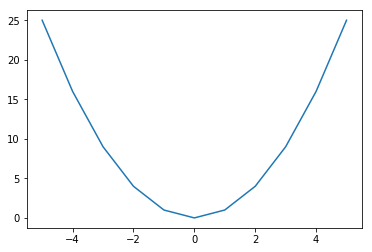

In [164]:
plt.figure()
x = np.arange(11) - 5 # from -5 to +5
y = x ** 2
plt.plot(x, y)

This uses the `pyplot` (aliased to `plt` as is typically done) procedural interface.  You can also use an Object-oriented style to do the same thing.

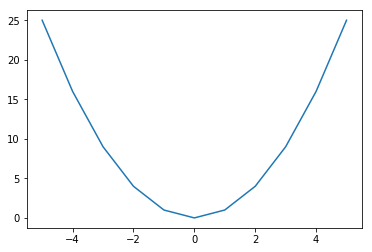

In [165]:
fig, ax = plt.subplots() # generates a Figure and Axis object
ax.plot(x, y) # plots x and y on an Axis

We will use the `pyplot` interface through the remainder of this tutorial.

Basic plot formatting is done with a marker code.  The marker code uses one character to specify a color, one character to specify a marker shape, and the rest to specify the line style.

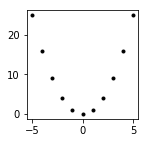

In [166]:
plt.figure(figsize=(2,2))
plt.plot(x, y, 'k.') # k=black .=dots

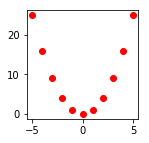

In [167]:
plt.figure(figsize=(2,2))
plt.plot(x, y, 'ro') # r=red o=circle

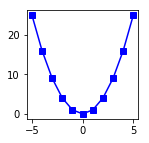

In [168]:
plt.figure(figsize=(2,2))
plt.plot(x, y, 'bs-') # b=blue s=square - = solid line

See [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for a description of all the options of marker formats.  The formats can also be specified explicitely with keyword arguments.  Here we repeat the above example in that calling style.

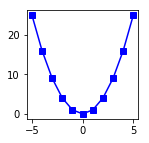

In [169]:
plt.figure(figsize=(2,2))
plt.plot(x, y, color='b', marker='s', linestyle='-')

The keyword form is particularly useful for defining the style in one place (a `dict`) and using in multiple plots.

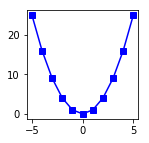

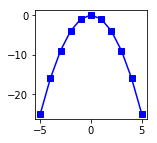

In [170]:
plotstyle = dict(color='b', marker='s', linestyle='-')
plt.figure(figsize=(2,2))
plt.plot(x, y, **plotstyle)

plt.figure(figsize=(2,2))
plt.plot(x, -y, **plotstyle)

You can put multiple plots into one figure using `plt.subplot()`

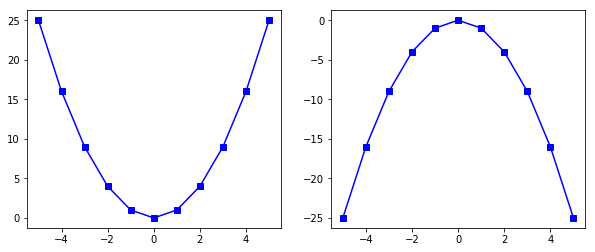

In [171]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1) # 1 row, 2 cols, plot #1
plt.plot(x, y, **plotstyle)
plt.subplot(1,2,2) # 1 row, 2 cols, plot #2
plt.plot(x, -y, **plotstyle)

Of course, you should always properly label your plots.  This example also shows how to save a plot to a file.  Vector graphics formats (like PDF) are preferred over raster graphics (e.g. PNG, JPG) for most applications.

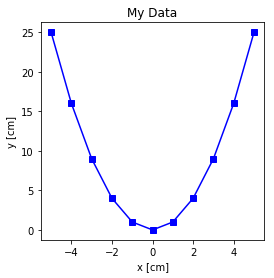

In [172]:
plt.figure(figsize=(4,4))
plt.plot(x, y, **plotstyle)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.title("My Data")
plt.savefig("example_plot.pdf", bbox_inches='tight')

(`bbox_inches='tight'` reduces the margins, good for importing into e.g. a latex document.)

In [174]:
!open example_plot.pdf

The plot can be made even more beautiful with latex-rendered axes.

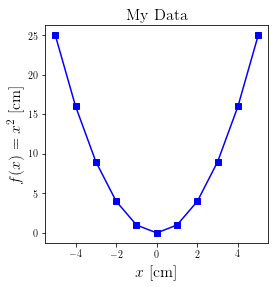

In [175]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.figure(figsize=(4,4))
plt.plot(x, y, **plotstyle)
plt.xlabel(r"$x$ [cm]", size=16)
plt.ylabel(r"$f(x) = x^2$ [cm]", size=16)
plt.title(r"My Data", size=16)
plt.savefig("example_plot2.pdf", bbox_inches='tight')

In [176]:
!open example_plot2.pdf

In the above example we adjusted the label text size to be more clear.  Literally everything about the plot can be customized; refer to the `pyplot` [documentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) for all the details, or use Google.

Many kinds of plots are supported, including:

 * `hist()`: 1-D histogram
 * `hist2d()`: 2-D histogram
 * `contour()`: Contour plot
 * `imshow()`: Display an image
 * `pcolormesh()`: Color map of a 2-D array
 * `quiver()`: vector field
 
Refer to the [gallery](https://matplotlib.org/gallery.html) to see even more posibilities.

## astropy – astronomy in python

[`astropy`](http://docs.astropy.org/en/stable/index.html) is a library of functions useful for astronomy.  It includes utilites for:

 * Astronomical coordinate systems (equatorial, ecliptic, galactic)
 * World Coordinate System transformations (pixels -> real-world units)
 * Time scales and formats (UTC, Barycentric Dynamical Time (TDB), Julian Days, etc.)
 * Solar System Ephemerides (Location of Moon, Sun, Mars, etc.)
 * Advanced file I/O, including FITS support and advanced ASCII parsing, and VOTable XML
 * Powerful data table object with database-like joins, searching, etc.
 * Astrophysical constants (e.g. c, AU, R_sun,) and unit-aware calculations

### dealing with dates using astropy.time

Of particular note is its time object, `astropy.time.Time`.  This has functionality for importing and converting time in the wide variety of formats used in astronomy. [Documentation is here.](http://docs.astropy.org/en/stable/time/).  Recall earlier we read in the Sac Peak Ca K data, which has time in separate columns of year, month, and day, which is not very useful for plotting.  We will use the `Time` object to convert this into a single number.

In [177]:
import astropy.time

dates: ['1976-11-20T17:00:00', '1976-11-21T17:00:00', '1976-11-29T17:00:00', '1976-12-04T17:00:00', '1976-12-07T17:00:00']
t_cak.decimalyear: [1976.88718124 1976.88991348 1976.9117714  1976.9254326  1976.93362933]
cak.dtype: [('month', '<i4'), ('day', '<i4'), ('year', '<i4'), ('EMDX', '<f4'), ('VIORED', '<f4'), ('K2VoK3', '<f4'), ('DELK1', '<f4'), ('DELK2', '<f4'), ('WilBapp', '<f4'), ('K3', '<f4')]


Text(0,0.5,'Ca K Emission Index')

/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


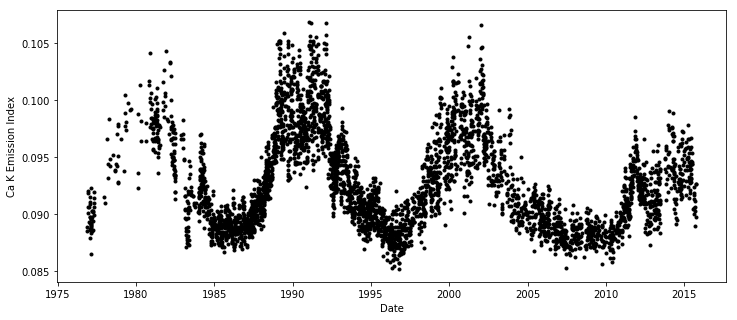

In [178]:
# build a list of date strings in the standard ISO format
dates = []
for i in range(len(cak['year'])):
    # midnight UTC - 7 24 - 7 = 17 == noon MST
    datestr = "%04i-%02i-%02iT17:00:00" % \
    (cak['year'][i], cak['month'][i], cak['day'][i])
    dates.append(datestr)
print("dates:", dates[0:5])

# convert the list into a Time object
t_cak = astropy.time.Time(dates, format='isot', scale='utc')
print("t_cak.decimalyear:", t_cak.decimalyear[0:5])

# now plot the data
plt.rc('text', usetex=False)
plt.rc('font', family='sansserif')
print("cak.dtype:", cak.dtype)
plt.figure(figsize=(12,5))
plt.plot(t_cak.decimalyear, cak['EMDX'], 'k.')
plt.xlabel("Date")
plt.ylabel("Ca K Emission Index")

## sunpy – python for solar physics

[sunpy](http://sunpy.org) is a relatively new (version 0.9) open-source package for solar data analysis.  It is  based on `astropy` and contains utilities for:

 * "Out of the box" support for solar data products (e.g. SDO AIA (via JSOC), HEK)
 * Mapping solar image pixels to heliographic coordinate systems
 * Time parsing for formats typically used in solar physics data
 * timeseries and spectra objects
 
 For a quick overview, look at their [brief tour](http://docs.sunpy.org/en/stable/guide/tour.html) and [gallery](http://docs.sunpy.org/en/stable/generated/gallery/index.html).

## Science Example: amplutide of Ca K variability

Let's try to find out how much the Sun varies in Calcium K using the Sac Peak data we imported above.  We will do this by generating an "average" solar cycle using a 1-year median filter and finding the Ca K values at maximum and minimum.

In [181]:
def running_func(f, t, x, w, lims=None):
    """Compute a function over a window for each day in a time segment"""
    if lims is None:
        lims = np.floor((t.jd.min() + w, t.jd.max() - w))
    t_func = np.arange(lims[0], lims[1], 1.0, dtype='i') # time axis: 1-day cadence
    x_func = np.zeros_like(t_func, dtype='f')
    for i, jd in enumerate(t_func):
        sel = (t.jd >= (jd - w)) & (t.jd <= (jd + w))
        if np.sum(sel) == 0:
            x_func[i] = np.nan
        else:
            x_func[i] = f(x[sel])
    t_func = astropy.time.Time(t_func, format='jd')
    return t_func, x_func

K varies from 0.085 to 0.107, or 25.4%
min(K) occurred on 1996-10-17T17:00:00.000
max(K) occurred on 1991-01-27T17:00:00.000
median K varies from 0.088 to 0.099, or 12.2%
min(medK) occurred on 2008-03-30T12:00:00.000
max(medK) occurred on 1979-12-05T12:00:00.000


/opt/local/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sansserif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


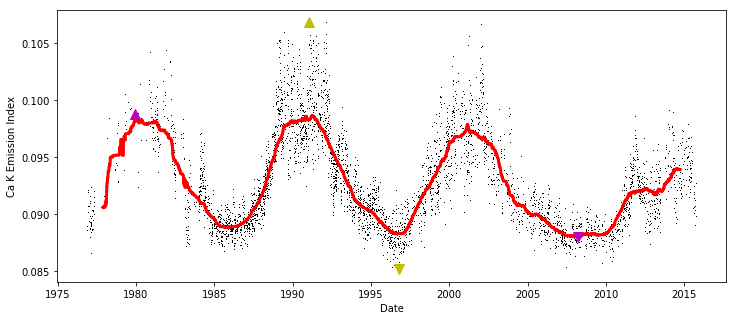

In [192]:
# Calculate the 1-year running median on the K-line data
K = cak['EMDX']
t_medK, medK = running_func(np.median, t_cak, K, 365.25)

# Find the max, min values of the original and smoothed data
def percent(xmin, xmax):
    """Calculate the percent change of some range"""
    return (xmax-xmin)/xmin * 100.

# First, the original data
ix_min = np.argmin(K)
ix_max = np.argmax(K)
Kmin = K[ix_min]
Kmax = K[ix_max]
print("K varies from %0.3f to %0.3f, or %0.1f%%" % (Kmin, Kmax, percent(Kmin, Kmax)))
print("min(K) occurred on", t_cak.isot[ix_min])
print("max(K) occurred on", t_cak.isot[ix_max])

# Now the smoothed data
ix_medmin = np.argmin(medK)
ix_medmax = np.argmax(medK)
medKmin = medK[ix_medmin]
medKmax = medK[ix_medmax]
print("median K varies from %0.3f to %0.3f, or %0.1f%%" % (medKmin, medKmax, percent(medKmin, medKmax)))
print("min(medK) occurred on", t_medK.isot[ix_medmin])
print("max(medK) occurred on", t_medK.isot[ix_medmax])

# Plot the original and smoothed data, highlighting the extrema
plt.figure(figsize=(12,5))
plt.plot(t_cak.decimalyear, cak['EMDX'], 'k,')
plt.plot(t_cak[ix_max].decimalyear, K[ix_max], 'y^', markersize=10)
plt.plot(t_cak[ix_min].decimalyear, K[ix_min], 'yv', markersize=10)

plt.plot(t_medK.decimalyear, medK, 'r-', linewidth=3)
plt.plot(t_medK[ix_medmax].decimalyear, medK[ix_medmax], 'm^', markersize=10)
plt.plot(t_medK[ix_medmin].decimalyear, medK[ix_medmin], 'mv', markersize=10)
plt.xlabel("Date")
plt.ylabel("Ca K Emission Index")

# Finally, save the plot to show to your advisor/mentor.  Good job, go get a beer!
plt.savefig("cak_range.pdf", bbox_inches='tight')

In [193]:
!open cak_range.pdf